# **Explanation of Anomaly Detection Algorithms**



In this project, I implemented two anomaly detection algorithms: Moving Average Anomaly Detection and Seasonal Decomposition Anomaly Detection.

# Moving Average Anomaly Detection:

Overview: This algorithm calculates the moving average of the data over a specified window size. It then computes the residuals by subtracting the moving average from the actual data points. Anomalies are identified when the absolute value of the residual divided by the standard deviation of the residuals exceeds a defined threshold.
 Effectiveness: This method is effective for detecting sudden changes in data trends, particularly when the data has a stable mean. However, it may not perform well in highly volatile environments or with data that exhibits strong seasonal patterns.


# Seasonal Decomposition Anomaly Detection:

Overview: This approach uses the seasonal decomposition of time series data to separate it into trend, seasonality, and residual components. The residuals are analyzed to find anomalies by comparing them against defined percentiles (lower and upper).
Effectiveness: Seasonal decomposition is powerful in identifying anomalies in data with clear seasonal patterns. It provides a robust framework for understanding the underlying components of the time series, allowing for more accurate anomaly detection. However, it requires sufficient data to effectively estimate seasonal patterns.
Conclusion
Both algorithms have their strengths and can be used complementary to enhance the robustness of anomaly detection in various applications. The choice of algorithm depends on the characteristics of the data being analyzed, such as seasonality, trend stability, and the presence of noise.

<Figure size 640x480 with 0 Axes>

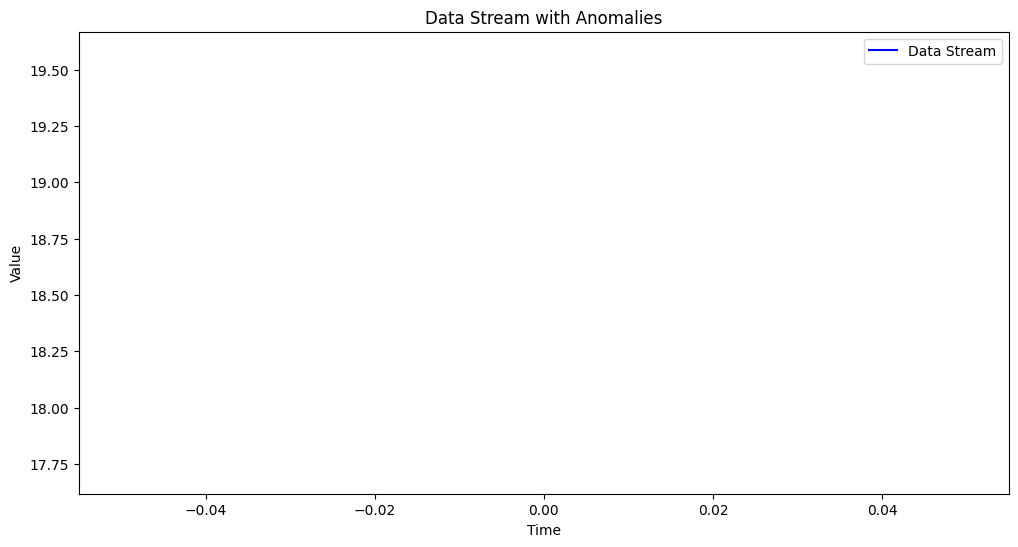

<Figure size 640x480 with 0 Axes>

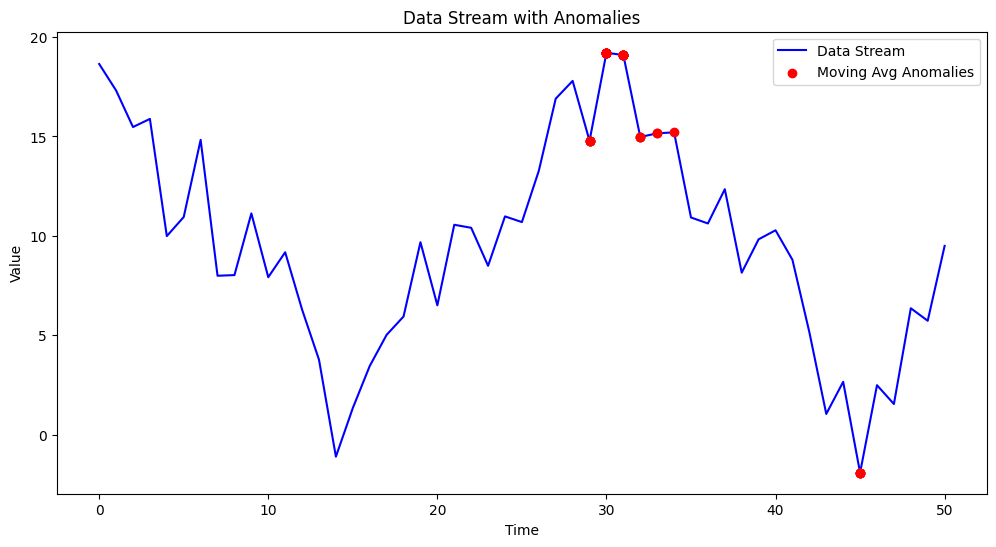

<Figure size 640x480 with 0 Axes>

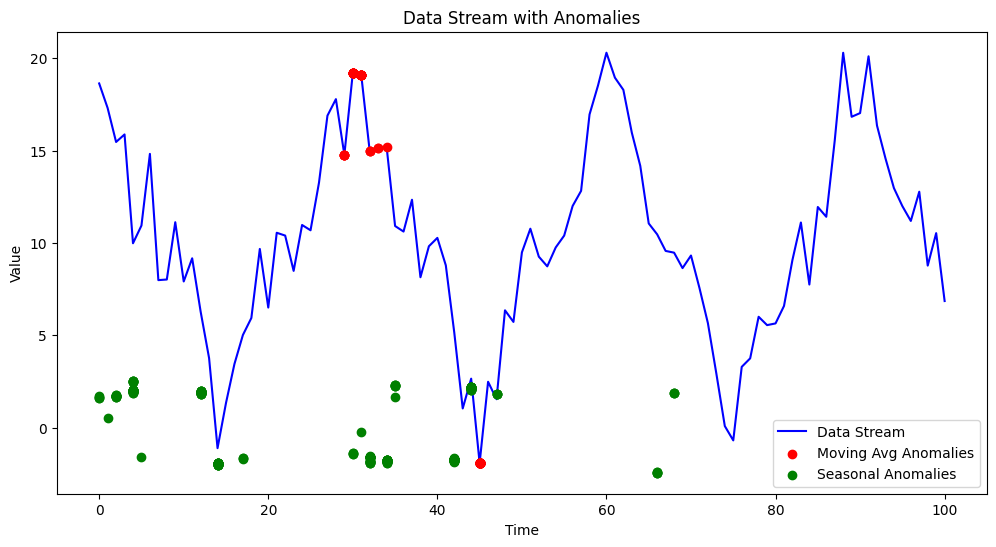

<Figure size 640x480 with 0 Axes>

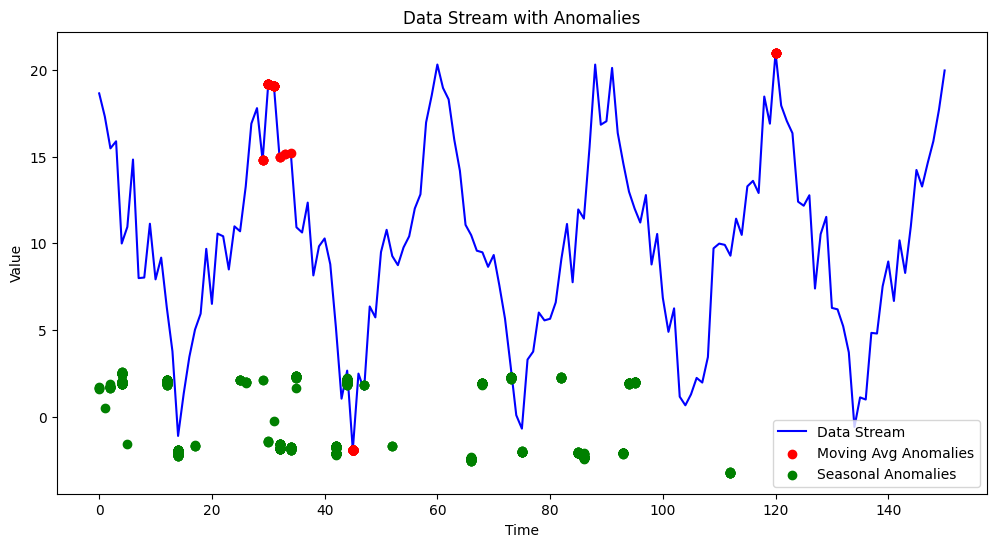

<Figure size 640x480 with 0 Axes>

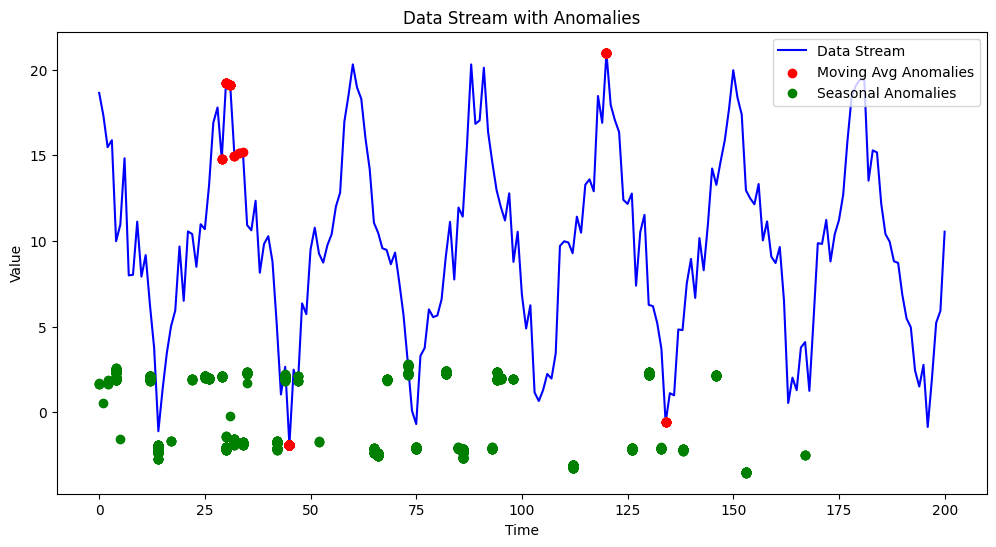

<Figure size 640x480 with 0 Axes>

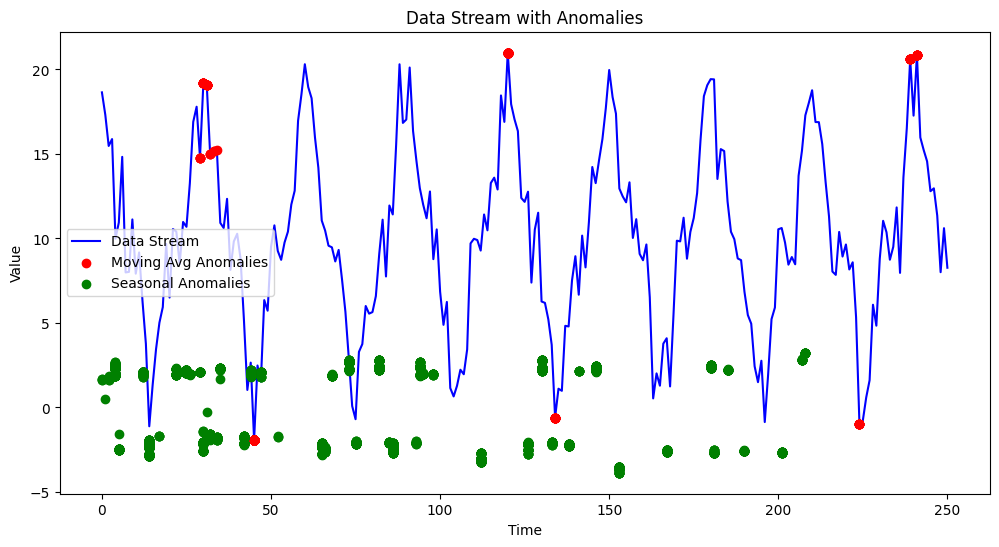

<Figure size 640x480 with 0 Axes>

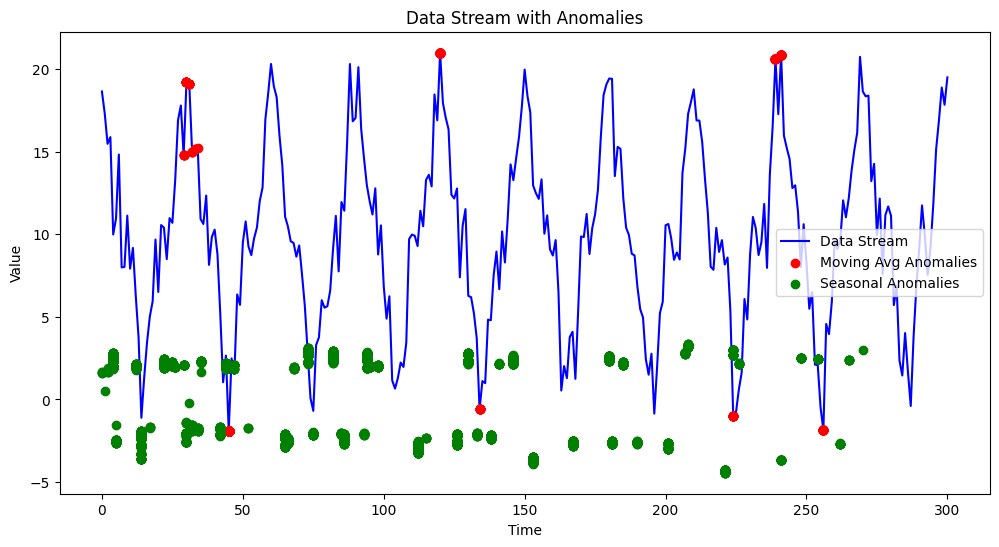

<Figure size 640x480 with 0 Axes>

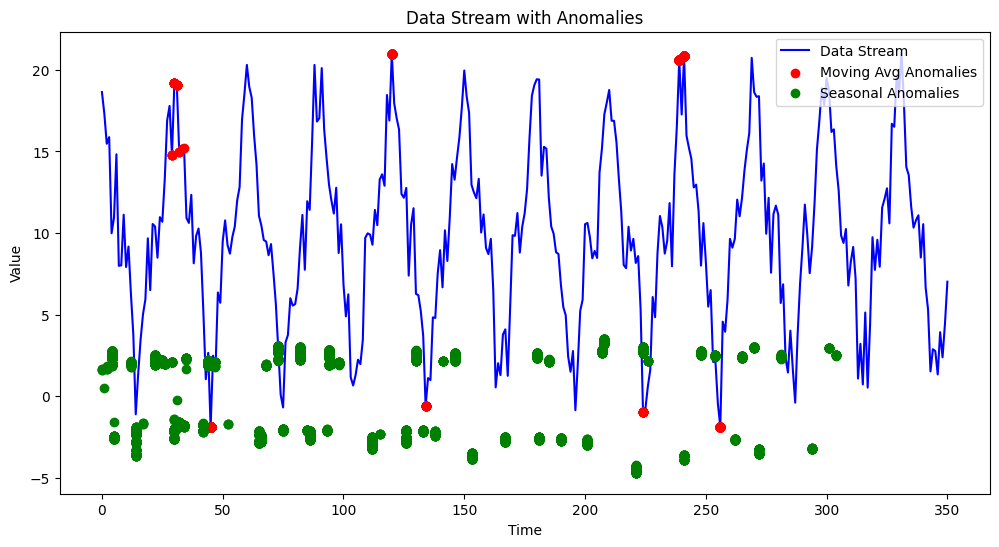

<Figure size 640x480 with 0 Axes>

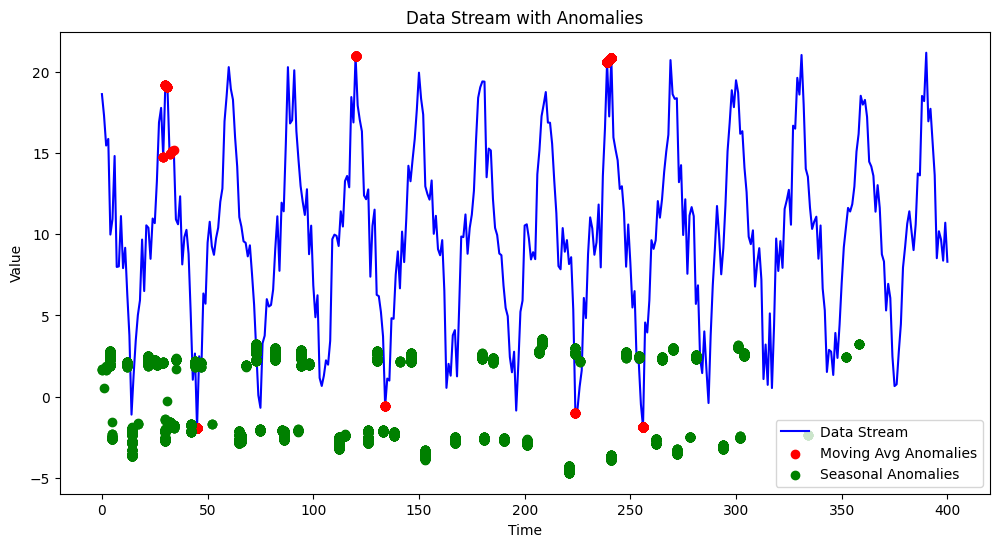

<Figure size 640x480 with 0 Axes>

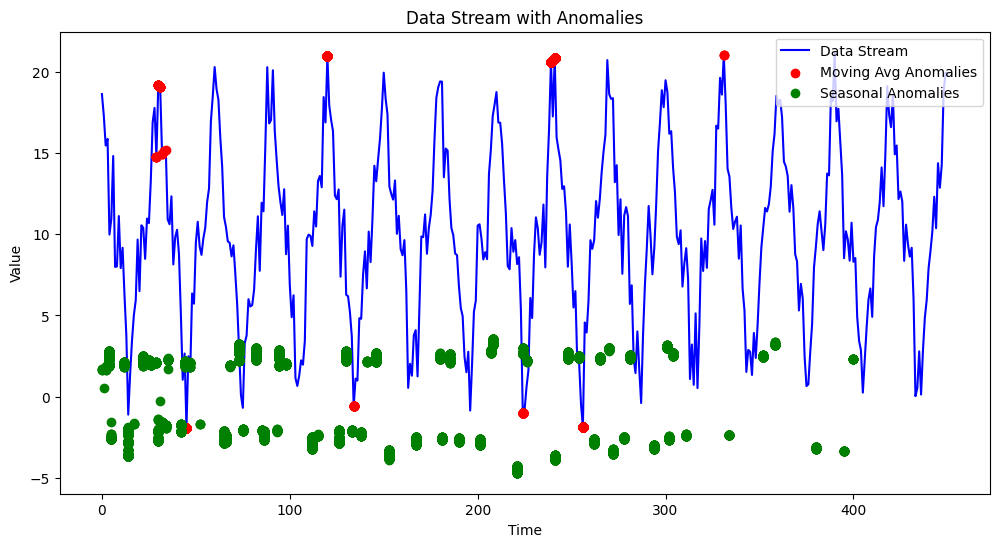

<Figure size 640x480 with 0 Axes>

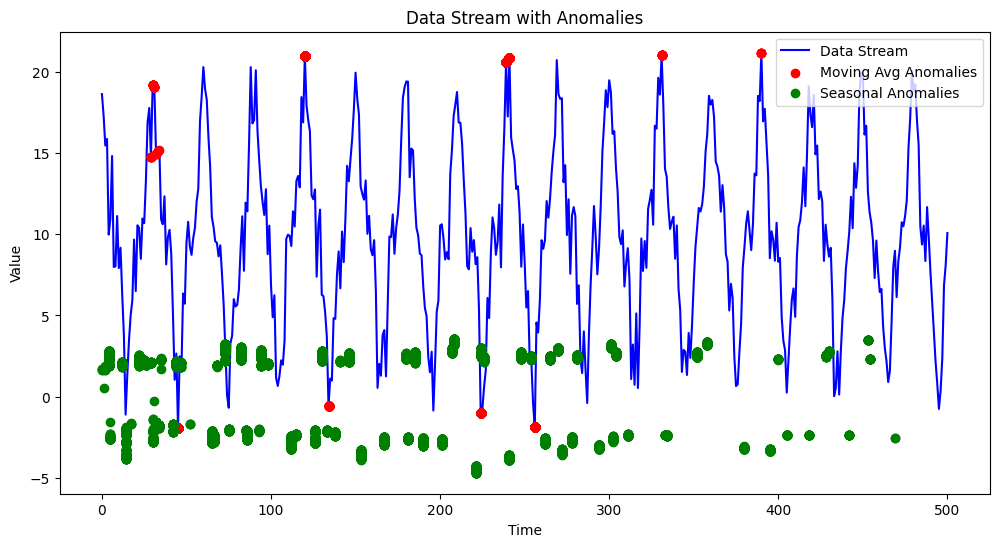

<Figure size 640x480 with 0 Axes>

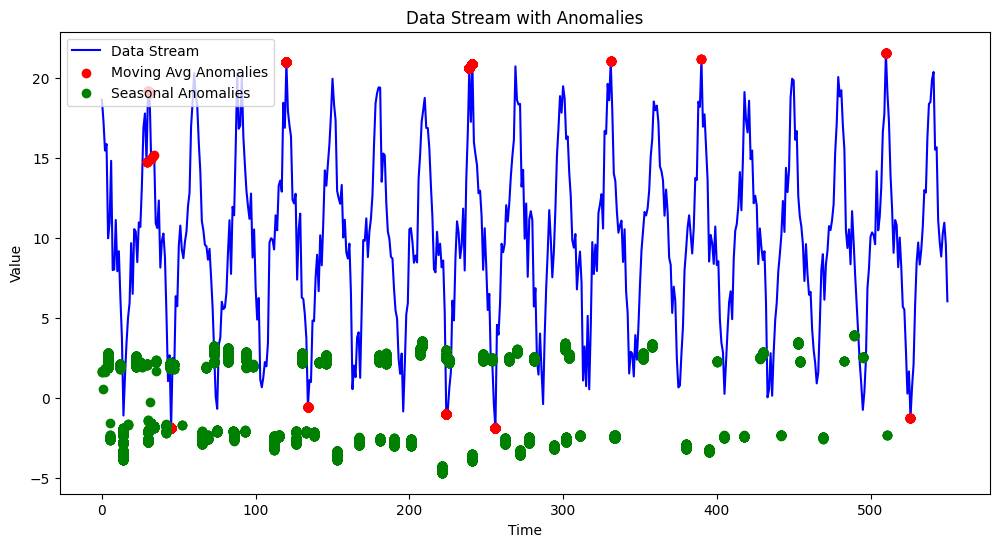

<Figure size 640x480 with 0 Axes>

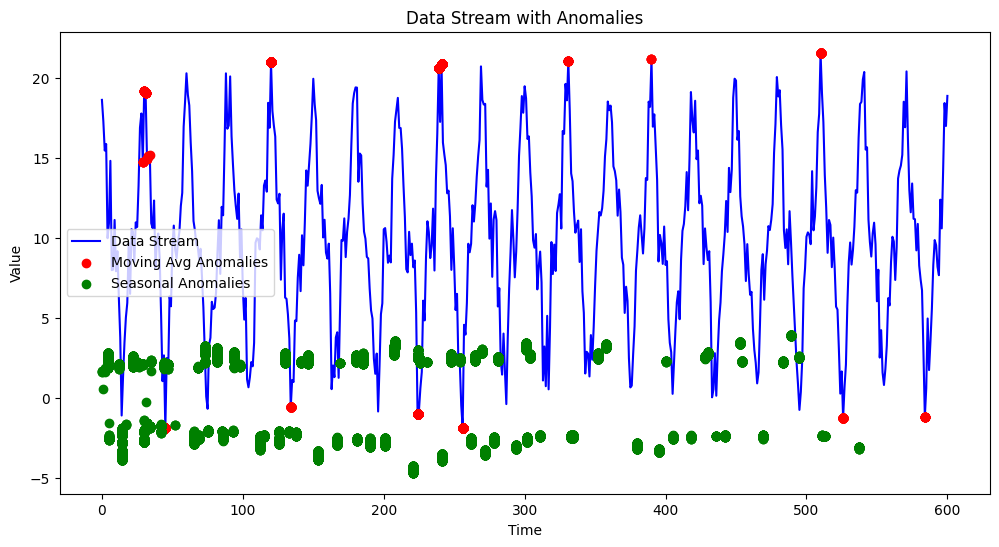

<Figure size 640x480 with 0 Axes>

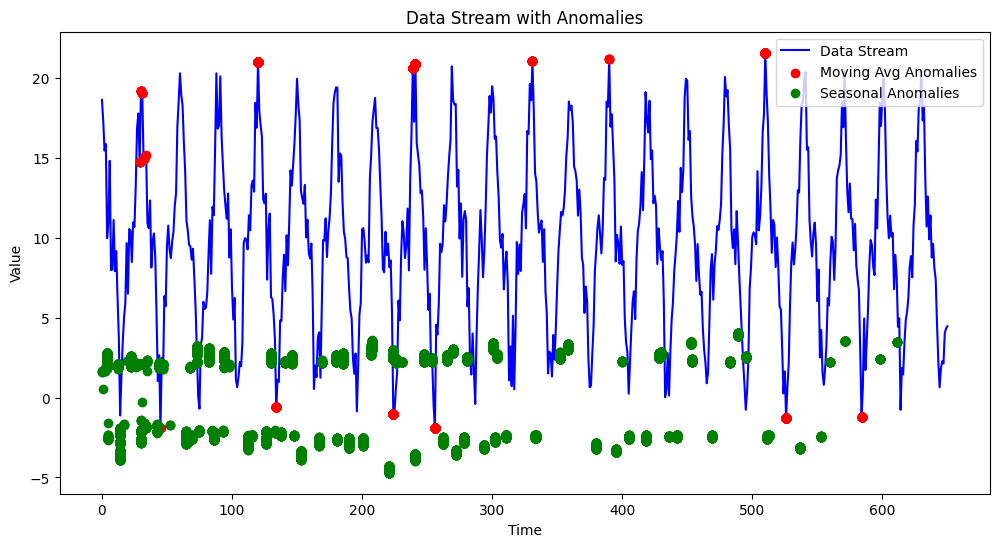

<Figure size 640x480 with 0 Axes>

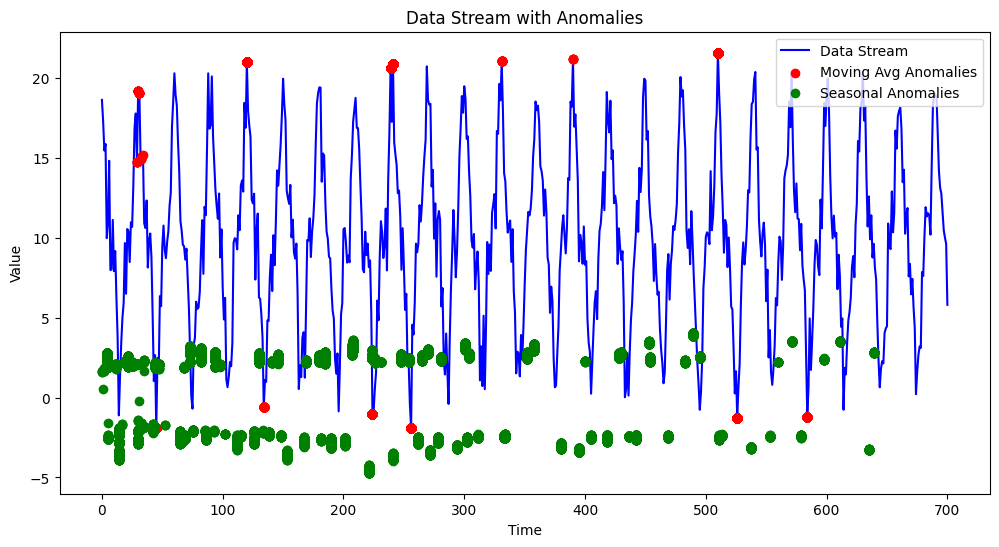

<Figure size 640x480 with 0 Axes>

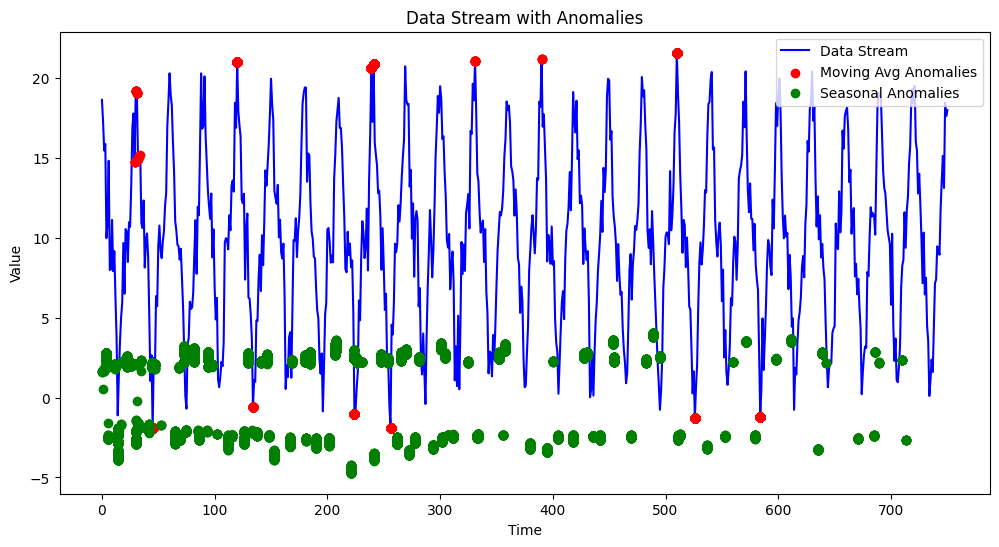

<Figure size 640x480 with 0 Axes>

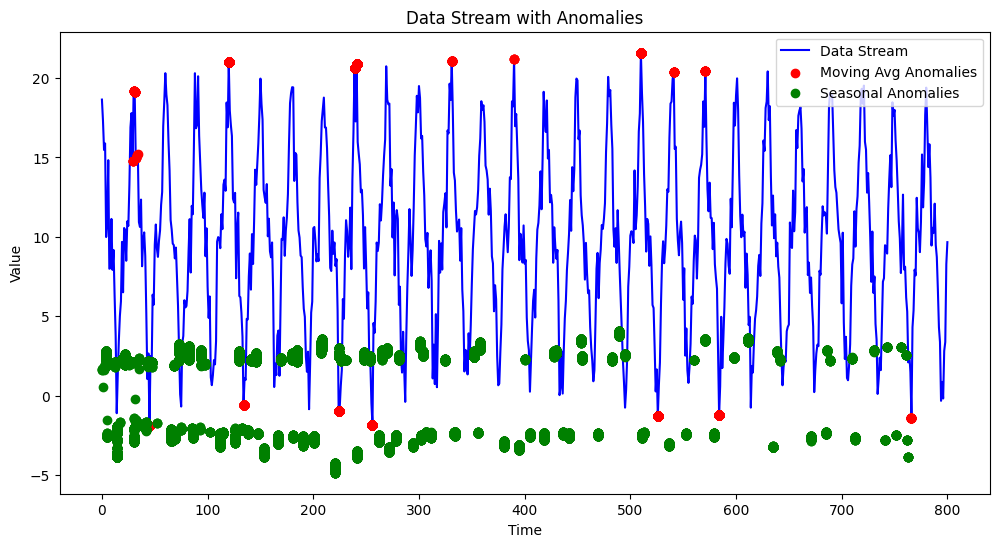

<Figure size 640x480 with 0 Axes>

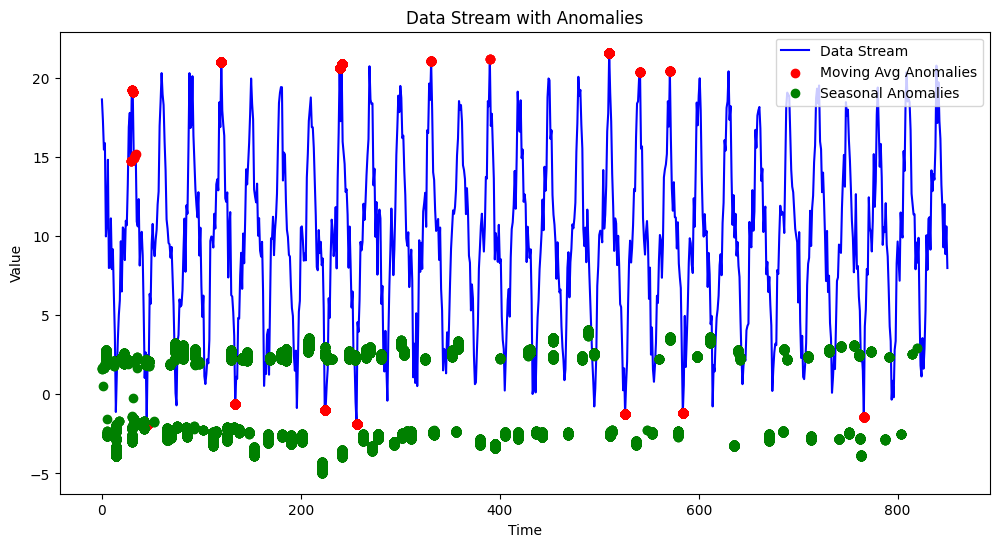

<Figure size 640x480 with 0 Axes>

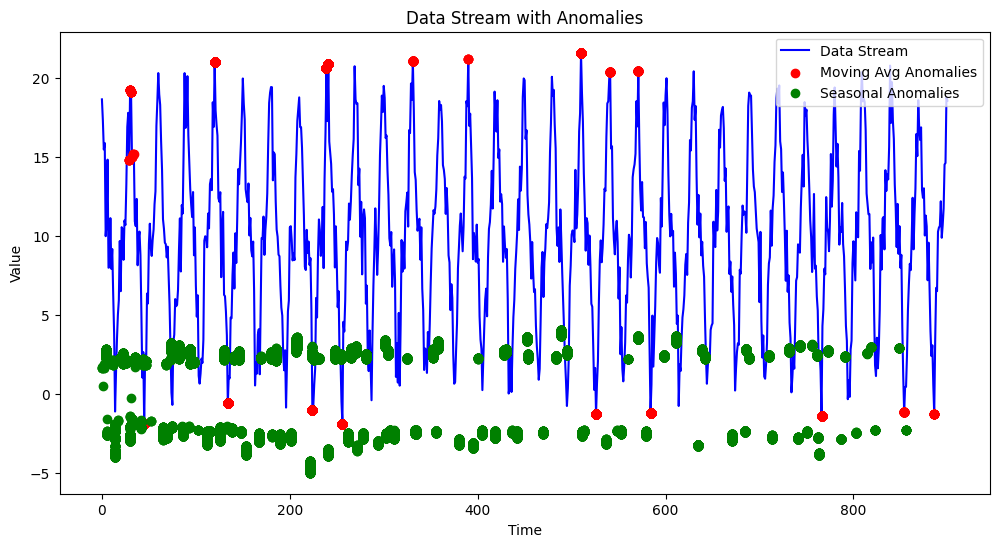

<Figure size 640x480 with 0 Axes>

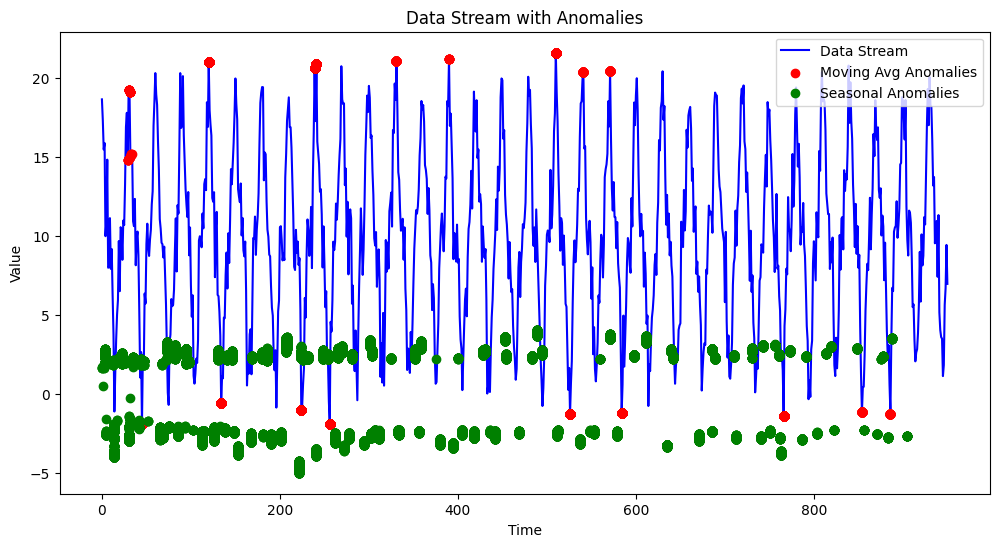

Data stream range: -1.9212696897342783 to 21.59488854701396


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import time

def generate_data_stream_v8(num_points=1000):
    """Generates a synthetic data stream with regular and seasonal patterns plus noise.

    Args:
        num_points (int): Number of points to generate in the data stream.

    Returns:
        np.ndarray: Array of generated data points.
    """
    time = np.arange(num_points)
    regular_pattern = 7 * np.cos(2 * np.pi * time / 30)
    seasonal_pattern = 2 * np.cos(2 * np.pi * time / 10)
    noise = np.random.normal(0, 1.5, num_points)
    data_stream = 10 + regular_pattern + seasonal_pattern + noise
    return data_stream

def moving_average_anomaly_detection(data, window_size=30, threshold=2):
    """Detects anomalies in the data using a moving average method.

    Args:
        data (np.ndarray): Input data stream.
        window_size (int): The size of the moving window for averaging.
        threshold (float): Threshold for identifying anomalies.

    Returns:
        List[Tuple[int, float]]: List of anomalies detected, each represented as a tuple of (index, value).
    """
    if len(data) < window_size:
        return []  # Not enough data points

    moving_avg = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    residuals = data[window_size - 1:] - moving_avg
    std_dev = np.std(residuals)

    if std_dev == 0:
        return []  # Skip detection if std_dev is zero

    anomalies = [(i + window_size - 1, data[i + window_size - 1])
                 for i in range(len(residuals)) if abs(residuals[i]) / std_dev > threshold]
    return anomalies

def seasonal_decomposition_anomaly_detection(data, period=30, lower_percentile=5, upper_percentile=95):
    """Detects anomalies using seasonal decomposition of time series data.

    Args:
        data (np.ndarray): Input data stream.
        period (int): Seasonal period for decomposition.
        lower_percentile (float): Lower percentile for anomaly detection.
        upper_percentile (float): Upper percentile for anomaly detection.

    Returns:
        List[Tuple[int, float]]: List of anomalies detected, each represented as a tuple of (index, value).
    """
    if len(data) < 2 * period:
        return []  # Not enough data points

    decomposition = seasonal_decompose(data, period=period, model='additive')
    residuals = decomposition.resid[~np.isnan(decomposition.resid)]

    if len(residuals) == 0:
        return []

    lower_bound = np.percentile(residuals, lower_percentile)
    upper_bound = np.percentile(residuals, upper_percentile)
    anomalies = [(i, x) for i, x in enumerate(residuals) if x < lower_bound or x > upper_bound]
    return anomalies

def stream_and_detect_v8(num_points=1000):
    """Streams data and detects anomalies in real time.

    Args:
        num_points (int): Number of points to process in the data stream.

    Returns:
        Tuple[np.ndarray, List[Tuple[int, float]], List[Tuple[int, float]]]: The data stream, moving average anomalies, and seasonal anomalies.
    """
    data_stream = generate_data_stream_v8(num_points)
    anomalies_ma = []
    anomalies_seasonal = []

    for i in range(num_points):
        current_data = data_stream[:i + 1]
        anomalies_ma += moving_average_anomaly_detection(current_data)
        anomalies_seasonal += seasonal_decomposition_anomaly_detection(current_data)

        if i % 50 == 0:  # Update visualization every 50 points
            visualize_v8(current_data, anomalies_ma, anomalies_seasonal)
            time.sleep(0.1)

    print(f"Data stream range: {np.min(data_stream)} to {np.max(data_stream)}")
    return data_stream, anomalies_ma, anomalies_seasonal

def visualize_v8(data, anomalies_ma, anomalies_seasonal):
    """Visualizes the data stream and highlights detected anomalies.

    Args:
        data (np.ndarray): The data stream to visualize.
        anomalies_ma (List[Tuple[int, float]]): Moving average anomalies.
        anomalies_seasonal (List[Tuple[int, float]]): Seasonal anomalies.
    """
    plt.clf()  # Clear the current figure
    plt.figure(figsize=(12, 6))  # Increased width of the plot
    plt.plot(data, label='Data Stream', color='blue')

    if anomalies_ma:
        anomaly_indices_ma, anomaly_values_ma = zip(*anomalies_ma)
        plt.scatter(anomaly_indices_ma, anomaly_values_ma, color='red', label='Moving Avg Anomalies', zorder=5)

    if anomalies_seasonal:
        anomaly_indices_seasonal, anomaly_values_seasonal = zip(*anomalies_seasonal)
        plt.scatter(anomaly_indices_seasonal, anomaly_values_seasonal, color='green', label='Seasonal Anomalies', zorder=5)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Data Stream with Anomalies')
    plt.legend()
    plt.pause(0.1)  # Pause to update the plot

# Run the detection and visualization
plt.ion()  # Enable interactive mode
data_stream_v8, anomalies_ma_v8, anomalies_seasonal_v8 = stream_and_detect_v8(1000)
plt.ioff()  # Disable interactive mode
plt.show()  # Show the final plot

